In [11]:
%load_ext autoreload
%autoreload 2
from src.util import utilities as u

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [15]:
from src.data import load_dataset

image_input_path = "../data/processed/image_uploads/letters"
cells = load_dataset.load_dataset(image_input_path)

print(cells["images"].shape)
single = cells['images'][0]
print(single.shape)

single_flat = single.reshape(-1)
print(single_flat.shape)


(3462, 16, 16)
(16, 16)
(256,)


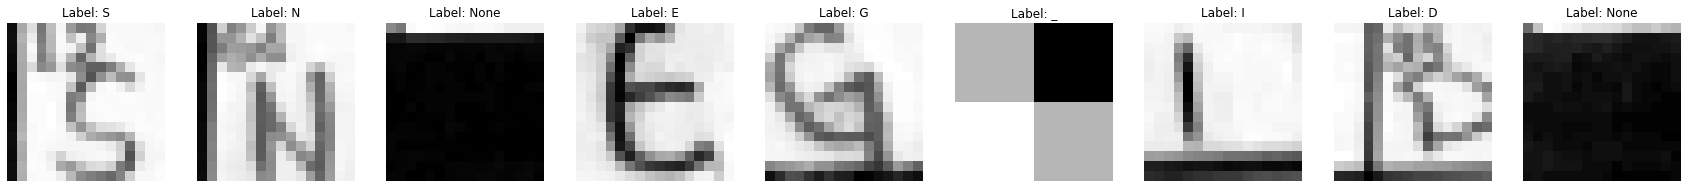

In [36]:
import matplotlib.pyplot as plt
from sklearn import svm, metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler

# flatten the images
n_samples = len(cells['images'])
data = cells['images'].reshape((n_samples, -1))

# Create a classifier: a support vector classifier
clf = svm.SVC(gamma='scale')

# Split data into 50% train and 50% test subsets
X_train, X_test, y_train, y_test = train_test_split(
    data, cells['targets'], test_size=0.7, shuffle=True
)


_, axes = plt.subplots(nrows=1, ncols=9, figsize=(30, 8))
for ax, image, prediction in zip(axes, X_train, y_train):
    ax.set_axis_off()
    image = image.reshape(16,16)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title(f"Label: {prediction}")

# Learn the digits on the train subset
clf.fit(X_train, y_train)

# Predict the value of the digit on the test subset
predicted = clf.predict(X_test)

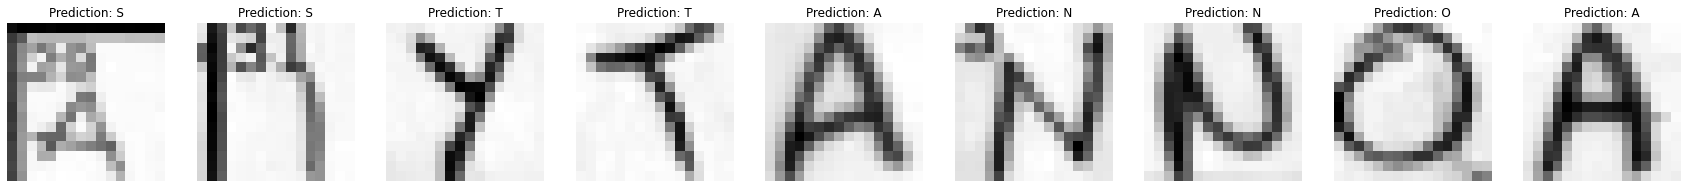

In [37]:
_, axes = plt.subplots(nrows=1, ncols=9, figsize=(30, 8))
for ax, image, prediction in zip(axes, X_test, predicted):
    ax.set_axis_off()
    image = image.reshape(16,16)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title(f"Prediction: {prediction}")

In [38]:
print(
    f"Classification report for classifier {clf}:\n"
    f"{metrics.classification_report(y_test, predicted)}\n"
)

Classification report for classifier SVC():
              precision    recall  f1-score   support

           A       0.66      0.82      0.73       238
           B       0.00      0.00      0.00        34
           C       0.00      0.00      0.00        56
           D       0.72      0.16      0.27        79
           E       0.60      0.81      0.69       253
           F       0.00      0.00      0.00        18
           G       1.00      0.25      0.40        48
           H       0.79      0.28      0.41        54
           I       0.67      0.62      0.65       117
           J       0.00      0.00      0.00         5
           K       0.00      0.00      0.00        30
           L       0.69      0.74      0.72       111
           M       0.63      0.52      0.57        52
           N       0.73      0.72      0.72       116
        None       1.00      1.00      1.00       371
           O       0.63      0.79      0.70       174
           P       0.00      0.00    

/home/bert/miniconda3/envs/nyt_print_crossword_checker/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/bert/miniconda3/envs/nyt_print_crossword_checker/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/bert/miniconda3/envs/nyt_print_crossword_checker/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this 

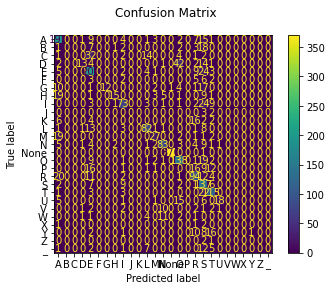

In [39]:

disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, predicted)
disp.figure_.suptitle("Confusion Matrix")

plt.show()

Theory: Black borders are causing all kinds of false positives. Need to isolate the letter.